<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/DEEP_AE_mnist_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# autoencoder using keras applied to mnist - dimensionality reduction
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets.mnist import load_data
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense, Activation, Dropout
from tensorflow.keras.utils import plot_model
from keras import regularizers
from keras.losses import mse, binary_crossentropy

In [3]:
# load dataset
(xtrain, _), (xtest, _) = load_data()   # dataset is already divided into training and testing sets
xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape(len(xtrain), np.prod(xtrain.shape[1:]))
xtest = xtest.reshape(len(xtest), np.prod(xtest.shape[1:]))

print(xtrain.shape)
print(xtest.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [4]:
# autoencoder
# call neural network API: sequential model is a linear stack of layers
autoencoder = Sequential()
autoencoder.add(Dense(units = 128, activation='relu', input_dim = 784, name='encoder_layer_1'))   # encoder layers
autoencoder.add(Dense(units =  64, activation='relu', input_dim = 128, name='encoder_layer_2'))   
autoencoder.add(Dense(units =  32, activation='relu', input_dim =  64, name='encoder_layer_3'))

autoencoder.add(Dense(units = 64, activation='relu', name='decoder_layer_1'))                    # decoder layers
autoencoder.add(Dense(units = 128, activation='relu', name='decoder_layer_2'))
autoencoder.add(Dense(units = 784, activation='sigmoid', name='decoder_layer_3'))

autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

autoencoder.summary()
plot_model(autoencoder, to_file='AE_plot.png', show_shapes=True, show_layer_names=True)

from IPython.display import Image 
Image('AE_plot.png')

history = autoencoder.fit(x = xtrain, y= xtrain, epochs=10, batch_size=32, shuffle=True,\
                    validation_data=(xtrain, xtrain), verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_layer_1 (Dense)      (None, 128)               100480    
_________________________________________________________________
encoder_layer_2 (Dense)      (None, 64)                8256      
_________________________________________________________________
encoder_layer_3 (Dense)      (None, 32)                2080      
_________________________________________________________________
decoder_layer_1 (Dense)      (None, 64)                2112      
_________________________________________________________________
decoder_layer_2 (Dense)      (None, 128)               8320      
_________________________________________________________________
decoder_layer_3 (Dense)      (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
__________________________________________________

(10000, 32)
313/313 [==============================] - 0s 1ms/step


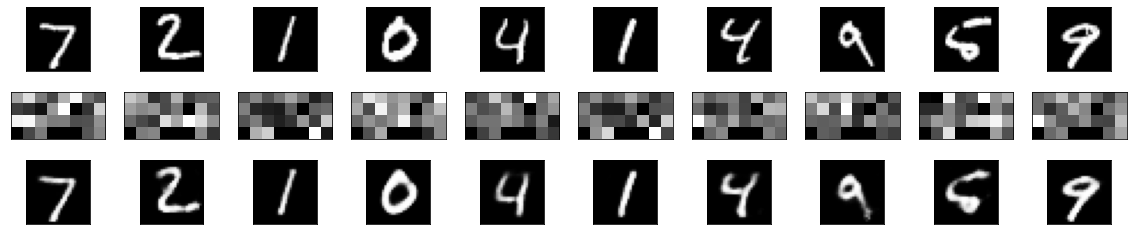

In [5]:
# encoder model: maps input to its encoded representation (reducer) - for dimensionality reduction
#encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('encoder_layer').output)
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.layers[2].output)
encoded_imgs = encoder.predict(xtest)

# retrieve the last layer of the autoencoder model

encoded_input = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[-3](encoded_input)
decoder_layer2 = autoencoder.layers[-2](decoder_layer1)
decoder_layer3 = autoencoder.layers[-1](decoder_layer2)

decoder = Model(inputs = encoded_input, outputs = decoder_layer3)

decoded_imgs = decoder.predict(encoded_imgs)

print(encoded_imgs.shape)

predicted_imgs = autoencoder.predict(xtest, verbose=1)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(4, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    #plt.imshow(predicted_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<Figure size 432x288 with 0 Axes>

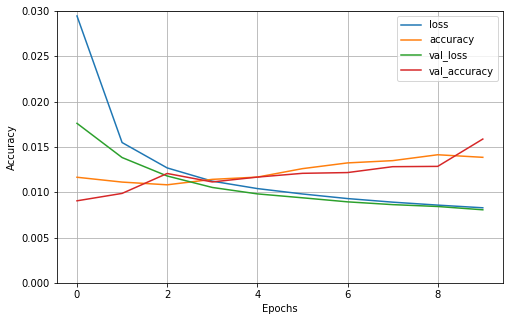

In [6]:
import pandas as pd

plt.figure()
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.03)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()